In [1]:
# libraries
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as MPL
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [2]:
# master Class
class master():
    def plot(self,FeaTest, LabTest, Model, title="Plotting Results"):
        LabTest_mod = np.array([x[0] for x in LabTest])
        plot_decision_regions(X=FeaTest, y=LabTest_mod, clf= Model, legend=2)
        MPL.title(title)
        MPL.show()

In [3]:
# Class Logistic Regression
class ClassLogisticRegression(master):
    def fit(self, ClassFeatures, ClassLabel):
        self.LearnRating, self.NoIterations = 0.001, 10000
        self.WeightValueTemp, self.BiasValueTemp = np.zeros(ClassFeatures.shape[1]), 0
        self.ClassFeatures, self.ClassLabel = ClassFeatures, ClassLabel
        for i in range(self.NoIterations):
            TempOne = (1+np.exp(-(self.ClassFeatures.dot(self.WeightValueTemp)+self.BiasValueTemp)))
            TempTwo = (1+np.exp(-(self.ClassFeatures.dot(self.WeightValueTemp)+self.BiasValueTemp)))
            WeightDev = np.dot(self.ClassFeatures.T, np.reshape(( (1/ TempOne) -self.ClassLabel.T), ClassFeatures.shape[0]))
            BiasDev = np.sum(np.reshape(( (1/ TempTwo ) -self.ClassLabel.T), ClassFeatures.shape[0]))/ClassFeatures.shape[0]
            self.WeightValueTemp = self.WeightValueTemp - self.LearnRating * WeightDev
            self.BiasValueTemp = self.BiasValueTemp - self.LearnRating * BiasDev
        return self
    def predict(self, ClassFeatures):
        return np.where( (1 / (1 + np.exp(-(ClassFeatures.dot(self.WeightValueTemp) + self.BiasValueTemp)))) >0.5, 1, 0)

In [4]:
# Class Linear Discriminant Analysis
class ClassLinearDiscriminantAnalysis(master):
    def fit(self, ClassFeatures, ClassLabel):
        self.DictPrior, self.DictMeans = dict(), dict()
        self.ValueConv = np.cov(ClassFeatures, rowvar=False)
        self.classes = np.unique(ClassLabel)
        for ClassNameTemp in self.classes:
            FeaturesClassWise = ClassFeatures[ClassLabel == ClassNameTemp]
            self.DictPrior[ClassNameTemp], self.DictMeans[ClassNameTemp] = FeaturesClassWise.shape[0] / ClassFeatures.shape[0], np.mean(FeaturesClassWise, axis=0)
    def predict(self, ClassFeatures):
        ListPredictions = list()
        for x in ClassFeatures:
            TempPostList = list()
            ListClasses = self.classes
            for ClassNameTemp in ListClasses:
                InvCovTemp = np.linalg.inv(self.ValueConv)
                TempDifference = x-self.DictMeans[ClassNameTemp]
                TempLikeliHoodValue = 0.5*np.log(np.linalg.det(InvCovTemp)) - 0.5*TempDifference.T @ InvCovTemp @ TempDifference
                TempValue = np.log(self.DictPrior[ClassNameTemp]) + TempLikeliHoodValue
                TempPostList.append(TempValue)
            TempPredValue = self.classes[np.argmax(TempPostList)]
            ListPredictions.append(TempPredValue)
        ArrayPred = np.array(ListPredictions)
        return ArrayPred

In [5]:
# main function to drive data
def ModelTraining(FeaTrain, FeaTest, LabTrain, LabTest):
    # model 1
    ClassLogisticRegression_Model = ClassLogisticRegression()
    ClassLogisticRegression_Model.fit( FeaTrain, LabTrain )	
    L_pred_1 = ClassLogisticRegression_Model.predict( FeaTest )
    print("Accuracy of Normal Logistic Regression ->",accuracy_score(LabTest, L_pred_1)) 
    if FeaTrain.shape[1] == 2:
        ClassLogisticRegression_Model.plot(FeaTest, LabTest, ClassLogisticRegression_Model, "Logistic Regression")
    # model 2
    ClassLinearDiscriminantAnalysis_Model = ClassLinearDiscriminantAnalysis()
    LabTrain_mod = np.array([x[0] for x in LabTrain])
    ClassLinearDiscriminantAnalysis_Model.fit(FeaTrain, LabTrain_mod)
    L_pred_2 = ClassLinearDiscriminantAnalysis_Model.predict(FeaTest)
    print("Accuracy of Linear Discriminant Analysis ->",accuracy_score(LabTest, L_pred_2)) 
    if FeaTrain.shape[1] == 2:
        ClassLinearDiscriminantAnalysis_Model.plot(FeaTest, LabTest, ClassLinearDiscriminantAnalysis_Model,"Linear Discriminant Analysis" )

In [6]:
# dataset fetching
DataFrameIris = datasets.load_iris()
ColumnNames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
AllFeatures = DataFrameIris.data[:100]
AllLabels = DataFrameIris.target[:100]
OneFeatures, TwoFeatures, OneLabel, TwoLabel = train_test_split(AllFeatures[:50],AllLabels[:50] , random_state=104, test_size=0.10,shuffle=True)
ThreeFeatures, FourFeatures, ThreeLabel, FourLabel = train_test_split(AllFeatures[50:100],AllLabels[50:100] , random_state=104, test_size=0.10,shuffle=True)
FeaturesTrain = pd.DataFrame(list(OneFeatures) + list(ThreeFeatures), index=None, columns=ColumnNames[:-1])
FeaturesTest = pd.DataFrame(list(TwoFeatures) + list(FourFeatures), index=None, columns=ColumnNames[:-1])
LabelsTrain = pd.DataFrame(list(OneLabel) + list(ThreeLabel), index=None, columns=ColumnNames[-1:])
LabelsTest = pd.DataFrame(list(TwoLabel) + list(FourLabel), index=None, columns=ColumnNames[-1:])

Case 1 - petal-length & petal-width
Accuracy of Normal Logistic Regression -> 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


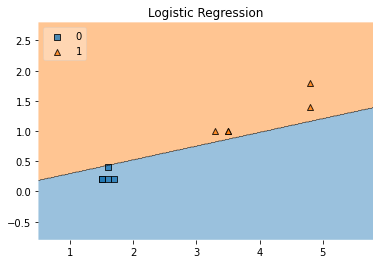

Accuracy of Linear Discriminant Analysis -> 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


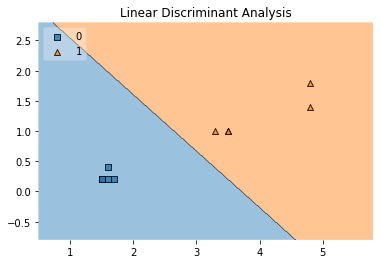

In [7]:
# Data 1
print("Case 1 - petal-length & petal-width")
ModelTraining(FeaturesTrain[['petal-length', 'petal-width']].values, FeaturesTest[['petal-length', 'petal-width']].values, LabelsTrain.iloc[:,:].values, LabelsTest.iloc[:,:].values)

Case 2 - sepal-length & sepal-width
Accuracy of Normal Logistic Regression -> 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


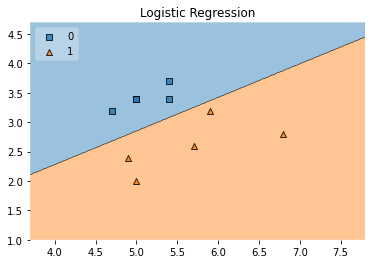

Accuracy of Linear Discriminant Analysis -> 1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


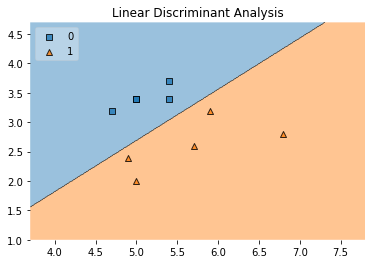

In [8]:
# Data 2
print("Case 2 - sepal-length & sepal-width")
ModelTraining(FeaturesTrain[['sepal-length', 'sepal-width']].values, FeaturesTest[['sepal-length', 'sepal-width']].values, LabelsTrain.iloc[:,:].values, LabelsTest.iloc[:,:].values)

In [9]:
# Data 3
print("Case 3 - All Features")
ModelTraining(FeaturesTrain.iloc[:,:].values, FeaturesTest.iloc[:,:].values, LabelsTrain.iloc[:,:].values, LabelsTest.iloc[:,:].values)

Case 3 - All Features
Accuracy of Normal Logistic Regression -> 1.0
Accuracy of Linear Discriminant Analysis -> 1.0
